## Getting started in Data Science 

In this tutorial we will be exploring and analysing the [Titanic dataset](https://www.kaggle.com/c/titanic/data) which is available on kaggle. This tutorial will provide you a basic approach towards understanding and analysing the data. We will proceed with small steps with me explaining each step then build upon these to make conclusions. It is a perfect turorial for those who are new to data science and wants to enter into a kaggle competition after completing an online course. So Let's get started.

For information about the competition check [here](https://www.kaggle.com/c/titanic).

Our objectives in this notebook are:

#### 1. Understanding the Data

In this we will load our data and then clean our data to reveal its mysteries we will do these using python libraries numpy and pandas. Then we will find our dependent and independent variables, identify their types, and missing data.

#### 2. Exploratory Data Analysis

It is quite clear with the name itself. In this we will find the patterns(aka mysteries) in each variables using our wand seaborn.

#### 3. Predictions using Machine Learning

Identification of the model based on our data and choosing the one which is best suited to our problem. The model we will use is Logistic Regression.

#### 4. Evaluation


Finally, we will evaluate the model on the test data. We will use train test split to split the data into training and testing set.

Let's get started!


##### Import the required libraries

* NumPy
* Pandas
* SciKit-Learn
* Seaborn
* Matplotlib
* statsmodels

In [643]:
# for understanding and analysis of data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for making predictions and analysing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
import statsmodels.formula.api as smf

#### Understanding the data

First Let's get our data

In [644]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine_df = [train_df, test_df]

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's see what is inside our data.

Below is the table of Variables with their name and definition.


| Variable | Definition |
| ----- | ----- | 
| PassengerId | unique id of the passenger |
| Survived	| Survival |
| Pclass |	Ticket class |
| Sex |	Sex |	
| Age |	Age in years |	
| Sibsp |	# of siblings / spouses aboard the Titanic	|
| Parch |	# of parents / children aboard the Titanic	|
| Ticket |	Ticket number	|
| Fare |	Passenger fare	|
| Cabin |	Cabin number	|
| Embarked | Port of Embarkation |

Now we have knowledge about the variables(we can also call them features its the same thing) we will identify their type(either categorical or numerical)

Categorical features:

* Pclass 
* Sex 
* Embarked (Those who do not know about port of Emabarkation, it is the port from which passengers have board the ship) 

Numerical features:

* Age
* Fare
* SibSp (not continuous)
* Parch (not continuous)

Other features like PassengerId, Ticket and Cabin number will not give us any information because they are specific to an individual. If you want you can do some feature engineering to get some more infromation for eg. in Name column we can extract some common words and take them out as separate feature or count the length of names etc.

Let's look at the number of values in features and check if there is some missing data.

In [645]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [646]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [647]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


You can see that in some variables there are missing entries(here these are denoted by 'NaN'). In Age there are 714 out of 891, in cabin only 204 and some in Embarked column. There is awesome way to visualize this we will use the power of seaborn.

Text(0.5,1,'Testing Data')

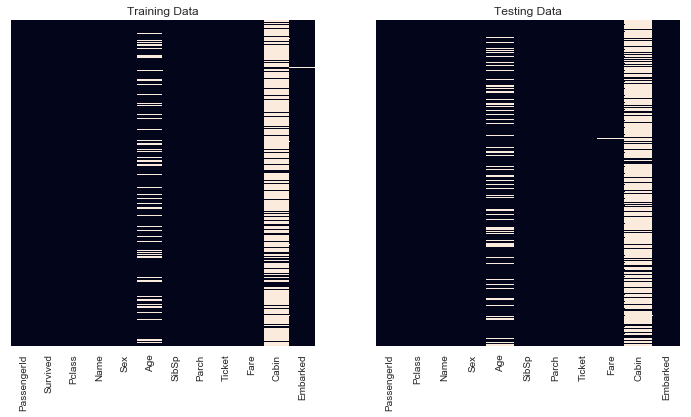

In [648]:
sns.set_style('darkgrid')

fig, (ax1, ax2) = plt.subplots(1,2,sharey=True, figsize=(12,6))


# dataframe having true value for 'nan' values and vice-versa
null_bool_train = train_df.isnull() 
null_bool_test = test_df.isnull()

# heat map shows the label where there is no missing data
sns.heatmap(null_bool_train, cbar=False, yticklabels=False, ax=ax1)
sns.heatmap(null_bool_test, cbar=False, yticklabels=False, ax=ax2)

ax1.set_title('Training Data')
ax2.set_title('Testing Data')

Now you can see clearly the distribution of missing data in the 'Age' and 'Cabin'. There is some missing data in age while in cabin a lot of missing data is there we can't get any useful information out of it so we might just delete it. One thing we can do is to include a new vabrible with values 0 for no cabin and 1 otherwise but due to lot of missing data this might not be very helpful. You can try this.


In [649]:
for dataset in combine_df:
    dataset.drop('Cabin', inplace=True, axis=1)

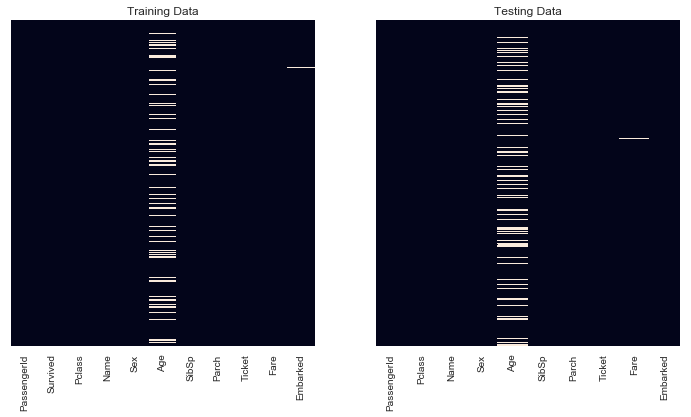

About age we will not delete it as age play an important role in predicting someone's survival. One thing we can do is to fill the missing data with the average value of remaing entries but this might create a problem especially in large number of missing values as most of the values will be a single value and might provide wrong information about an observation because of  which algorithm might perform poorly. We will see if there is another way to fix this one way is to do find out use visualization which is our next step.

#### Exploratory Data Analysis

In this step we will understand about each variable(dependent and independent variables) separately and their effect on each other through awesome visualization. This is my favourite part, it's gonna be fun. Let's start.

Let's first look at the dependent variable 'Survived' column.

In [650]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

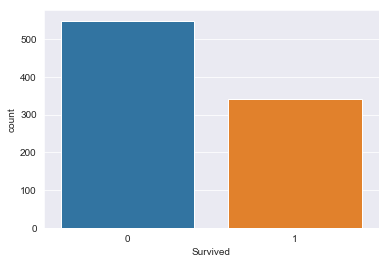

In [652]:
# 0 : not survived, 1 : Survived
ax = sns.countplot(x='Survived', data=train_df)

Now we will see the survival based on these following categorical features 'Pclass', 'Sex',and 'Embarked'

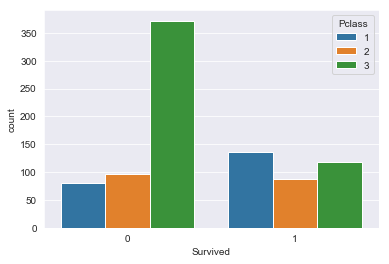

In [653]:
ax = sns.countplot(x = 'Survived', hue = 'Pclass', data = train_df) 

Looks like lot of people belong to class 3 did not survive.

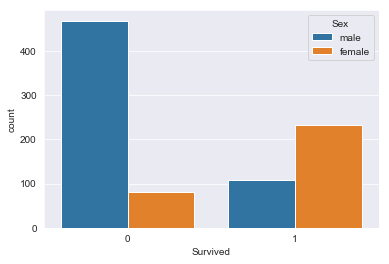

In [654]:
ax = sns.countplot(x = 'Survived', hue='Sex', data=train_df)

This shows that female has higher chance of survival making 'Sex' an important parameter.

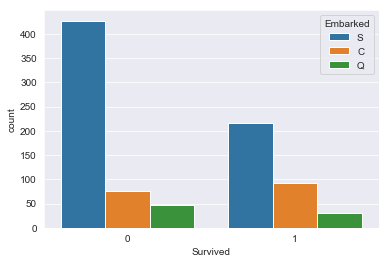

In [655]:
ax = sns.countplot(x = 'Survived', hue='Embarked', data=train_df)

All these plot shows that 'Sex', 'Pclass' and 'Embarked' plays an important role in deciding the chances of survival

Now look at some numerical variables

<Figure size 720x360 with 0 Axes>

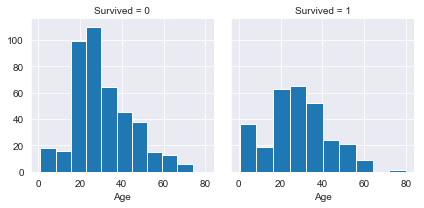

In [656]:
plt.figure(figsize=(10,5))
ax = sns.FacetGrid(train_df, col='Survived')
ax.map(plt.hist, 'Age')

This shows
* Lot of children below 10 years survived.
* Most of the passengers are between 15 to 30 years of age
* Old people 80 years of age also survived

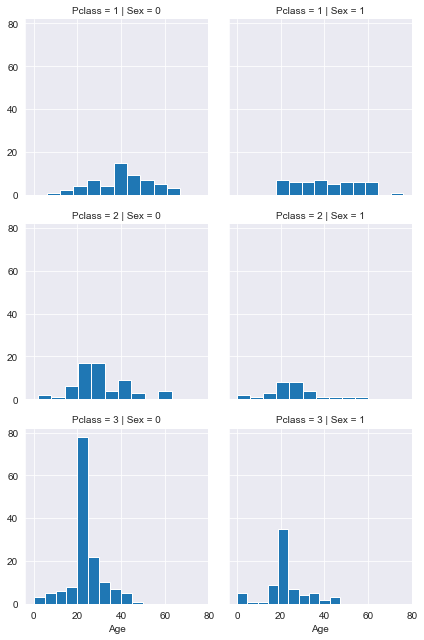

In [657]:
ax = sns.FacetGrid(df, row='Pclass', col='Sex')
ax.map(plt.hist, 'Age')

In passenger class 3 most people between 20 to 30 years of age did not survive.

People with higher age group are belong to class 1 which makes sense money takes time to accumulate.

Now we will fill the missing data in age using these above 6 categories. For each category we will calculate the mean then fill the missing values that lies in that category.



In [658]:
for df in combine_df:
    for pclass in [1,2,3]:
        for sex in ['male','female']:
            data_grp = df[(df['Sex'] == sex) & (df['Pclass'] == pclass)]
            average_age = data_grp[data_grp.isnull() == False]['Age'].mean()
            df.loc[(df.Age.isnull()) & (df.Sex == sex) & (df.Pclass == pclass), 'Age'] = average_age
            
    df['Age'] = df['Age'].astype(int)

Age distribution

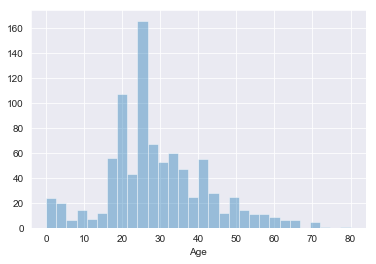

In [660]:
ax = sns.distplot(train_df['Age'], bins=30, kde=False)

You can see our method has assigned large number of average age of class 3 as this class has the highest number of passengers. Now we have all the values in Age column but you might say that most of the values are repeated and can it not affect our model in a bad way? You might be right, it depends on the dataset if there is significant loss of infromation after dropping or replacing the missing values then probably it might not be a good idea.

Let's see again our distribution of missing data.

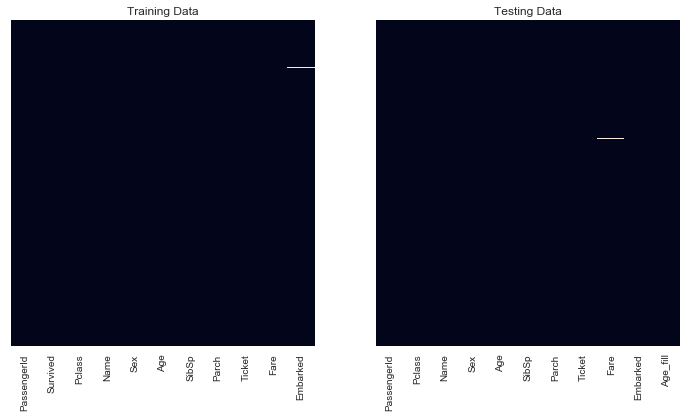

There is still some missing data left let's just drop the remaining missing values.

In [661]:
for df in combine_df:
    df.dropna(inplace=True)

Great! It looks we no longer have any missing values.

Let's see what 'Fare' column has to say.

Text(0.5,1,'Testing Data')

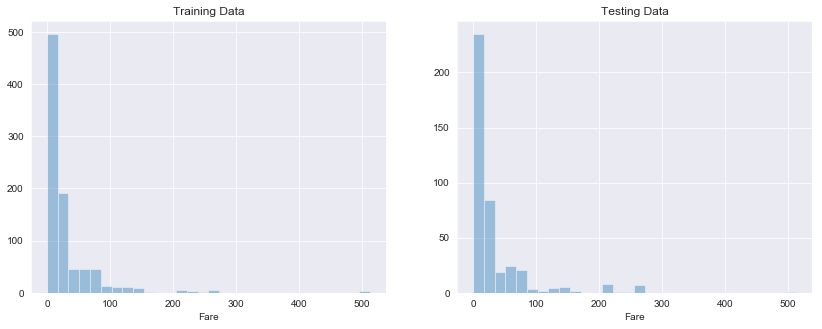

In [662]:

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

sns.distplot(train_df['Fare'], bins=30, kde=False, ax=ax1)
ax1.set_title('Training Data')

sns.distplot(test_df['Fare'], bins=30, kde=False, ax=ax2)
ax2.set_title('Testing Data')


Looks like the fare prices distribution is positively skewed with most of fare prices fall within 1 to 100 and there are some outliers way out there around 500 on training data.

Let's find out who are these persons and throw them out from our data.

In [663]:
train_df[train_df['Fare'] > 400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,C


In [664]:
train_df.drop([258,679,737], axis=0, inplace=True)

Now let's see the other features 'SibSp' and 'Parch'

C:\Users\amanj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Parents or children on board')

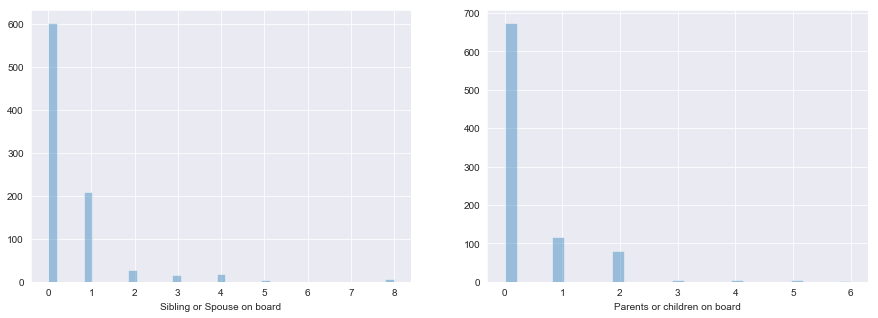

In [665]:

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

sns.distplot(train_df['SibSp'], kde=False, ax = ax1)
ax1.set_xlabel('Sibling or Spouse on board')

sns.distplot(train_df['Parch'], kde=False, ax = ax2)
ax2.set_xlabel('Parents or children on board')

Most of the people do not have any siblings or spouse on board. With one sibling or spouse most will be couples. Same goes for children and parents.

We are almost ready now we just need to convert the categorical features to numerical features and drop the non-essential features.

In [666]:
for df in combine_df:
    df['Sex'] = df['Sex'].map({'female':1, 'male':0})# sex column
    df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})# embarked column

Let's check see our data again.

In [667]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,0


In [668]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34,0,0,330911,7.8292,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7.0000,0
2,894,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9.6875,2
3,895,3,"Wirz, Mr. Albert",0,27,0,0,315154,8.6625,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12.2875,0


In [669]:
for df in combine_df:
    df.drop(['Name', 'Ticket'], axis=1, inplace=True)

#### Predictions using Machine Learning

There are lot of Machine Learning models out there almost 50+ so identification of a model is important. We do this based on our problem which is in our case supervised classification and regression this narrows the models.

The models which are best suited for our problem are:
* Logistic Regression
* k-nearest neighbours
* Support Vector Machines
* Random Forest

In our case we will focus on Logistic Regression.

Let's Separate the features and labels

In [670]:
XTrain = train_df.drop(['PassengerId','Survived'], axis=1)
yTrain = train_df['Survived']

columns = XTrain.columns
P_id = test_df['PassengerId']

We need to scale the features so that each one has the same effect on the output variable.

In [671]:
scaler = StandardScaler()

XTrain = scaler.fit_transform(XTrain)

test_df.drop('PassengerId', axis=1, inplace=True)
test_data = scaler.fit_transform(test_df)

##### Logistic Regression

In this model we calculate the probability of an observation based on which we classify the observation. For eg. if p(x) > 0.5 then it belong to class 1 or vice-versa. This model is best suited for binary classification. The probability is calculated using the equation below.

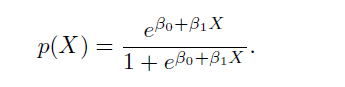

The coefficients are predicted using maximum likelihood method in which we try to maximize the likelihood function

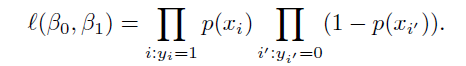



If you want more information about Logistic Regression reference [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

In [673]:
clf = LogisticRegression()

clf.fit(XTrain, yTrain)

clf.score(XTrain,yTrain)

0.809255079006772

Its pretty good for our first attempt. But its on Training data which is a bad measure to asses your model, better way is to check accuracy on unknown(testing) data.

#### Evaluation

Let's split the data into training and testing set.

In [674]:
X_train, X_test, y_train, y_test = train_test_split(XTrain, yTrain, test_size=0.33, random_state=42)

In [675]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7952218430034129

Looks like we are doing great.

Now let's see the coefficient of our variables for further interpretation.(optional)

In [676]:
# optional
X_train = sm.add_constant(X_train)
est = smf.Logit(y_train, X_train).fit()
coef_df = est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.426955
         Iterations 7


In [677]:
columns = columns.insert(0,'Intercept')
coef_df.index = columns
coef_df

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-0.777868,0.116028,-6.704118,2.026268e-11,-1.005279,-0.550456
Pclass,-1.109916,0.168324,-6.593937,4.283148e-11,-1.439824,-0.780007
Sex,1.309425,0.117672,11.127730,9.194728e-29,1.078792,1.540058
Age,-0.604090,0.134184,-4.501947,6.733385e-06,-0.867087,-0.341094
SibSp,-0.460414,0.161167,-2.856749,4.280047e-03,-0.776296,-0.144532
Parch,-0.041251,0.119869,-0.344137,7.307432e-01,-0.276189,0.193687
Fare,-0.108815,0.144375,-0.753698,4.510307e-01,-0.391784,0.174154
Embarked,0.135781,0.112533,1.206587,2.275912e-01,-0.084780,0.356342


If the coefficient of a variable is positive then increase in the value of that variable will increase the probability of survival and negative coefficient will result in decrease in probability.

For some of the coefficients the p-value is not statistically significant(for last 3) which means that we failed to reject the hypothesis that the presence of these coefficents have no influence on the predictor variable. In other words these variables might not be important in our model.

Let's check the score after dropping the last 3 variables.
Training score = 0.81
train_test_split score = 0.791

You can see there is very slight difference but it was worth a try.

In [640]:
# submission

y_pred = clf.predict(test_data)

submission = pd.DataFrame({'PassengerId':P_id, 'Survived':y_pred})

submission.to_csv('submission.csv',index=False)

Congrats! you made it to the end. I hope you have understood each and every step if don't please let me know. Any suggestions and improvements are most welcome.

Follow me on [github](https://github.com/Aman-Jindal) for more notebooks.